# Segundo Projeto de Econometria I

## Discentes: Iuri Soares, Mariana Tinouco, Miguel Melo 

# Importando bibliotecas, pacotes e dados

## Importando pacotes e bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning # omite avisos de warning no Python
import statsmodels.stats.diagnostic as smd # fornece os testes diagnósticos p/ heterocedasticidade
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns

## Importando dados

In [2]:
tickers = ['ITUB3.SA', 'ENBR3.SA', 'VIVT3.SA']
start_date = '2005-01-01'
end_date = '2022-12-31'

In [3]:
dados = pd.DataFrame(columns=['Ibovespa'] + tickers)

In [4]:
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    dados[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
ibovespa_data = yf.download('^BVSP', start=start_date, end=end_date)
dados['Ibovespa'] = ibovespa_data['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [6]:
dados.dropna(inplace=True)

### Dataframe

In [7]:
returns = dados.pct_change()

returns.describe()

,Ibovespa,ITUB3.SA,ENBR3.SA,VIVT3.SA
count,4450.000000,4450.000000,4450.000000,4450.000000
mean,0.000477,0.000646,0.000640,0.000392
std,0.017304,0.020418,0.019759,0.018252
min,-0.147797,-0.200718,-0.127683,-0.123588
25%,-0.008476,-0.010186,-0.009739,-0.009324
50%,0.000679,0.000000,0.000000,0.000000
75%,0.009839,0.011195,0.010976,0.010125
max,0.146560,0.160787,0.155556,0.123216


# Análise Gráfica

## Cálculo da volatilidade 

In [8]:
volatility_ibovespa = returns['Ibovespa'].std()
volatility_acao1 = returns['ITUB3.SA'].std()
volatility_acao2 = returns['ENBR3.SA'].std()
volatility_acao3 = returns['VIVT3.SA'].std()

In [9]:
if volatility_acao1 > volatility_ibovespa:
    print("ITUB3.SA apresenta maior volatilidade em relação ao Ibovespa.")
else:
    print("ITUB3.SA apresenta menor volatilidade em relação ao Ibovespa.")

if volatility_acao2 > volatility_ibovespa:
    print("ENBR3.SA apresenta maior volatilidade em relação ao Ibovespa.")
else:
    print("ENBR3.SA apresenta menor volatilidade em relação ao Ibovespa.")

if volatility_acao3 > volatility_ibovespa:
    print("VIVT3.SA apresenta maior volatilidade em relação ao Ibovespa.")
else:
    print("VIVT3.SA apresenta menor volatilidade em relação ao Ibovespa.")

ITUB3.SA apresenta maior volatilidade em relação ao Ibovespa.
ENBR3.SA apresenta maior volatilidade em relação ao Ibovespa.
VIVT3.SA apresenta maior volatilidade em relação ao Ibovespa.


## Gráfico das Volatilidades

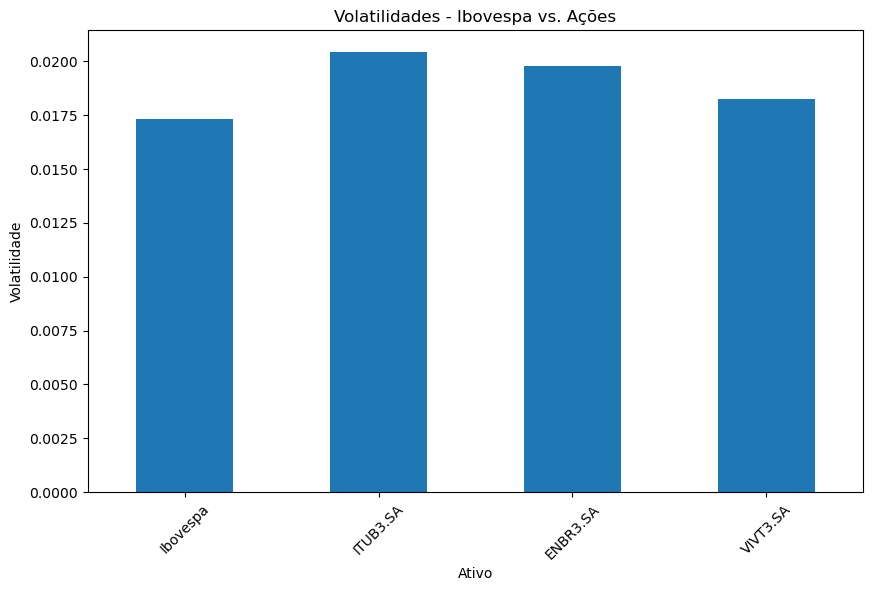

In [10]:
# Calcula as volatilidades
volatilities = returns.std()

# Plota o gráfico de barras das volatilidades
plt.figure(figsize=(10, 6))
volatilities.plot(kind='bar')
plt.title('Volatilidades - Ibovespa vs. Ações')
plt.xlabel('Ativo')
plt.ylabel('Volatilidade')
plt.xticks(rotation=45)

plt.show()

## Gráfico de Retornos

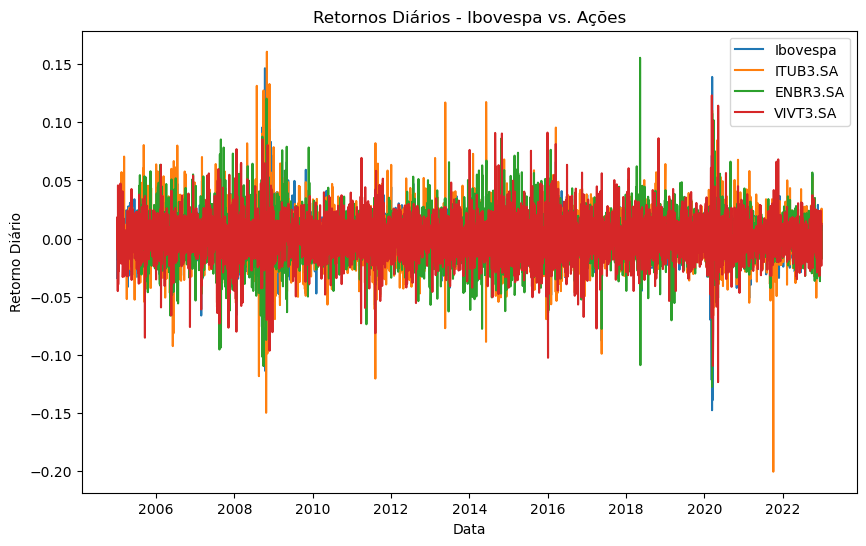

In [11]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Plot dos retornos diários do Ibovespa e das ações selecionadas
plt.plot(returns.index, returns['Ibovespa'], label='Ibovespa')
plt.plot(returns.index, returns['ITUB3.SA'], label='ITUB3.SA')
plt.plot(returns.index, returns['ENBR3.SA'], label='ENBR3.SA')
plt.plot(returns.index, returns['VIVT3.SA'], label='VIVT3.SA')

# Personalização do gráfico
plt.title('Retornos Diários - Ibovespa vs. Ações')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.legend()

# Exibindo o gráfico
plt.show()

## Gráfico de Boxplot

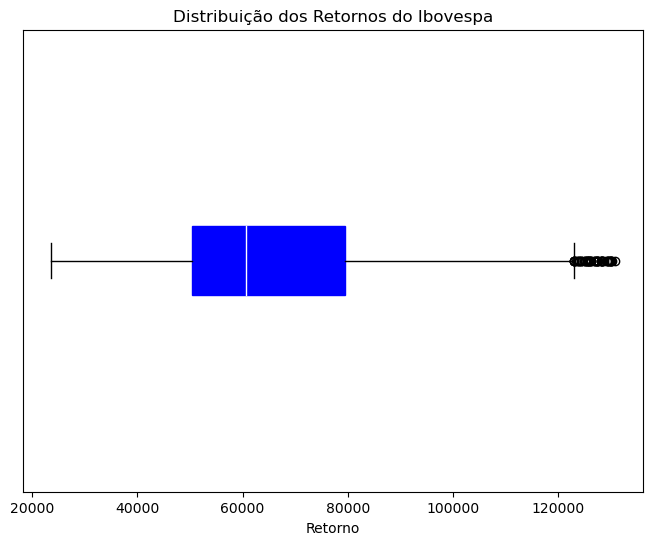

In [12]:
plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura
plt.boxplot(dados['Ibovespa'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='white'))  # Plot do boxplot para o Ibovespa
plt.title('Distribuição dos Retornos do Ibovespa')  # Título do gráfico
plt.xlabel('Retorno')  # Rótulo do eixo x
plt.yticks([])  # Removendo os ticks do eixo y
plt.show()  # Exibindo o gráfico

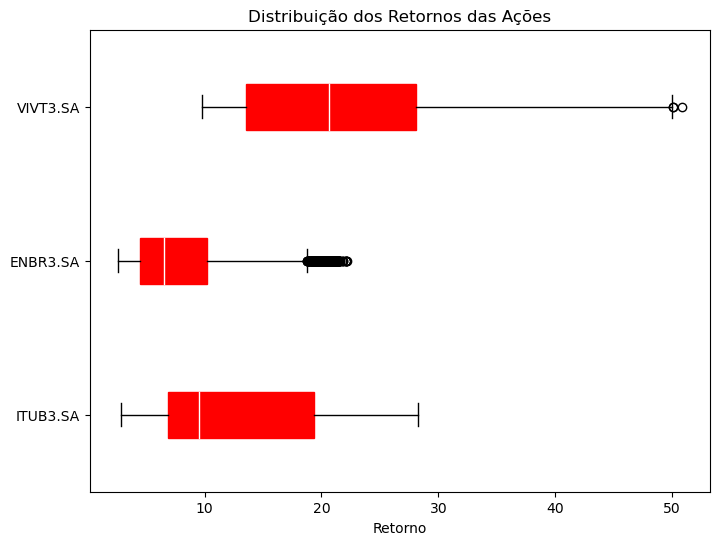

In [13]:
plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura
plt.boxplot([dados['ITUB3.SA'], dados['ENBR3.SA'], dados['VIVT3.SA']], vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='red'), medianprops=dict(color='white'))  # Plot do boxplot para as ações
plt.title('Distribuição dos Retornos das Ações')  # Título do gráfico
plt.xlabel('Retorno')  # Rótulo do eixo x
plt.yticks([1, 2, 3], ['ITUB3.SA', 'ENBR3.SA', 'VIVT3.SA'])  # Definindo os rótulos personalizados para o eixo y
plt.show()  # Exiba o gráfico

## Gráfico de Linhas

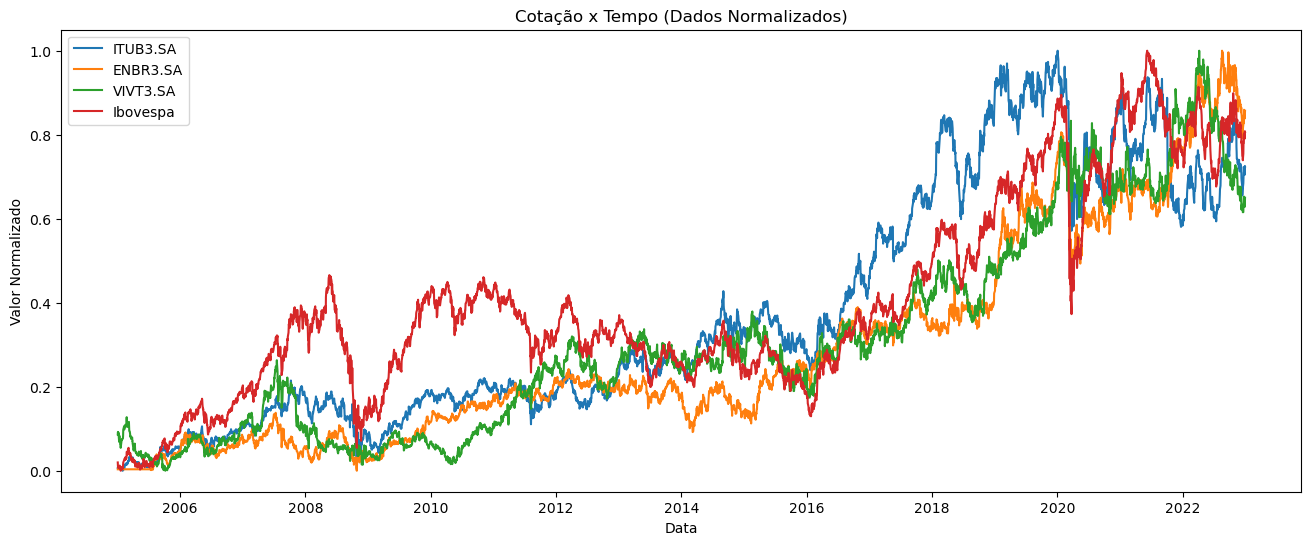

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Realizando a normalização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dados[tickers + ['Ibovespa']])

# Criando um novo DataFrame com os dados normalizados
normalized_df = pd.DataFrame(normalized_data, columns=tickers + ['Ibovespa'], index=dados.index)

# Definindo o tamanho da figura
plt.figure(figsize=(16, 6))

# Plot dos preços de fechamento diários das ações normalizadas selecionadas
for i in tickers:
    plt.plot(normalized_df.index, normalized_df[i], label=i)

# Plot do Ibovespa normalizado
plt.plot(normalized_df.index, normalized_df['Ibovespa'], label='Ibovespa')

# Personalização do gráfico
plt.title('Cotação x Tempo (Dados Normalizados)')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.legend()

# Exibir o gráfico
plt.show()

## Gráfico de Histograma

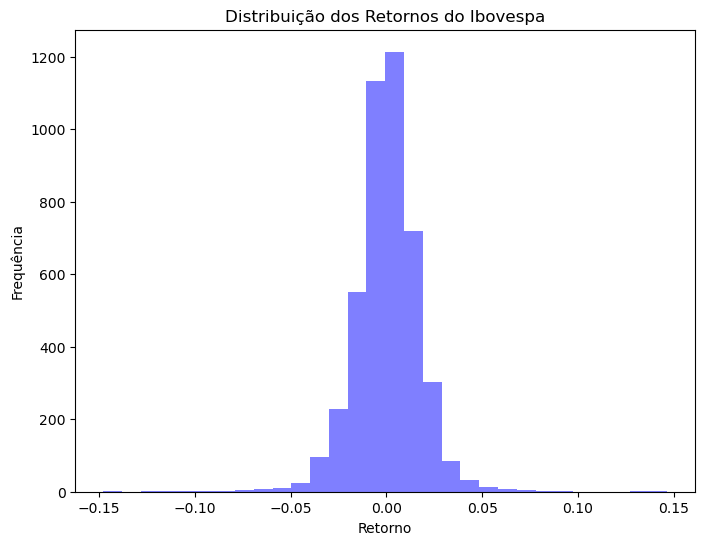

In [15]:
plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura
plt.hist(returns['Ibovespa'], bins=30, color='blue', alpha=0.5)  # Plot do histograma
plt.title('Distribuição dos Retornos do Ibovespa')  # Título do gráfico
plt.xlabel('Retorno')  # Rótulo do eixo x
plt.ylabel('Frequência')  # Rótulo do eixo y
plt.show()  # Exibindo o gráfico

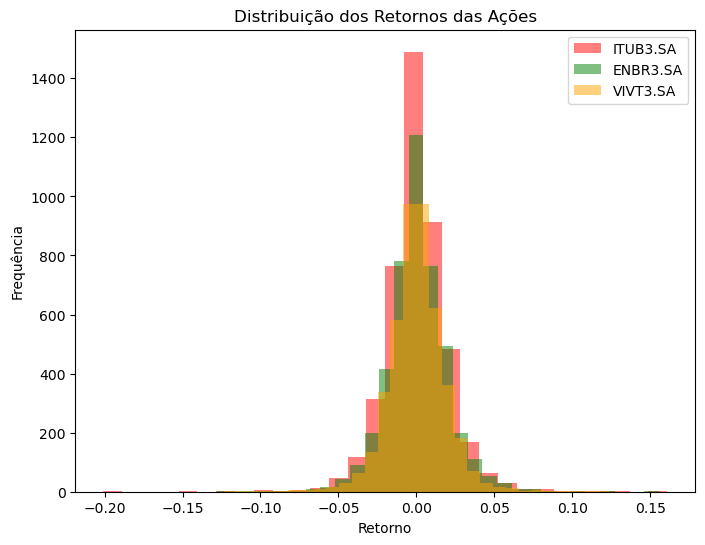

In [16]:
plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura
plt.hist(returns['ITUB3.SA'], bins=30, color='red', alpha=0.5, label='ITUB3.SA')  # Plot do histograma para ITUB3.SA
plt.hist(returns['ENBR3.SA'], bins=30, color='green', alpha=0.5, label='ENBR3.SA')  # Plot do histograma para ENBR3.SA
plt.hist(returns['VIVT3.SA'], bins=30, color='orange', alpha=0.5, label='VIVT3.SA')  # Plot do histograma para VIVT3.SA
plt.title('Distribuição dos Retornos das Ações')  # Título do gráfico
plt.xlabel('Retorno')  # Rótulo do eixo x
plt.ylabel('Frequência')  # Rótulo do eixo y
plt.legend()  # Exibindo a legenda
plt.show()  # Exibindo o gráfico

## Gráfico de Dispersão

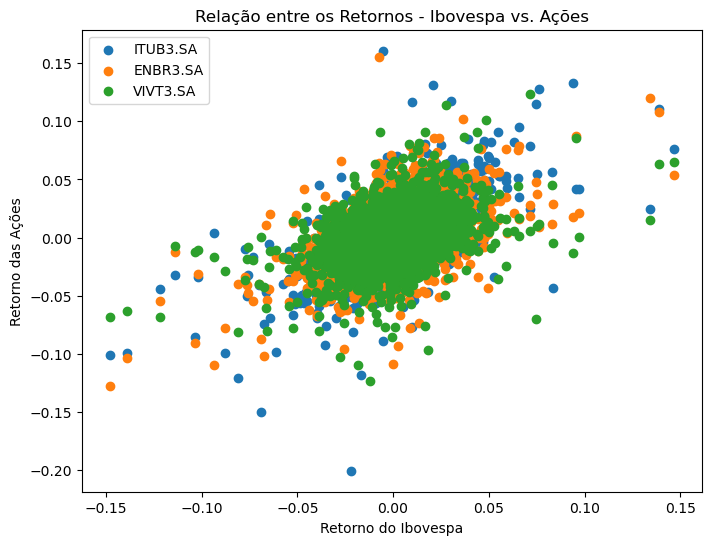

In [17]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Plot do gráfico de dispersão
plt.scatter(returns['Ibovespa'], returns['ITUB3.SA'], label='ITUB3.SA')
plt.scatter(returns['Ibovespa'], returns['ENBR3.SA'], label='ENBR3.SA')
plt.scatter(returns['Ibovespa'], returns['VIVT3.SA'], label='VIVT3.SA')

# Personalização do gráfico
plt.title('Relação entre os Retornos - Ibovespa vs. Ações')
plt.xlabel('Retorno do Ibovespa')
plt.ylabel('Retorno das Ações')
plt.legend()

# Exibindo o gráfico
plt.show()

## Mapa de calor

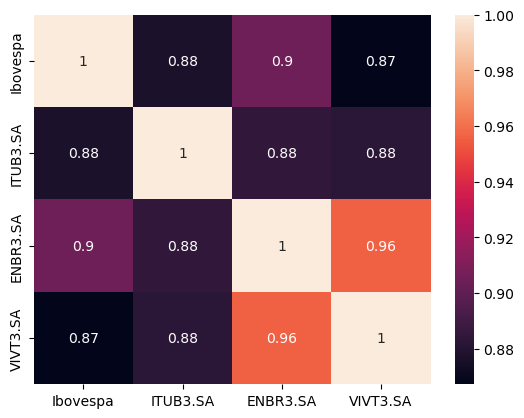

In [18]:
sns.heatmap(dados.corr(), annot = True)
plt.show()

## Explicação dos Gráficos e do Dataframe

Por meio dessa análise dos gráficos e do dataframe podemos obter informações relevantes sobre as volatilidades, retornos, distribuições e relações entre as ações individuais (ITUB3.SA, ENBR3.SA, VIVT3.SA) e o índice Ibovespa. O objetivo desta análise é fornecer uma visão geral dessas informações e discutir possíveis implicações relacionadas aos conceitos de multicolinearidade, autocorrelação e heterocedasticidade.

Ao analisar o gráfico de volatilidades, observamos que a ITUB3.SA apresenta a maior volatilidade entre as ações, seguida pela ENBR3.SA, VIVT3.SA e, por fim, o Ibovespa. Essa análise indica que as ações individuais têm uma maior dispersão em seus retornos em comparação com o índice de mercado.

Em relação aos retornos médios, verificamos que as ações individuais têm retornos ligeiramente mais altos do que o Ibovespa. E para uma avaliação mais precisa dos retornos ao longo do tempo, podemos examinar o gráfico de linhas ou histogramas, que fornecem uma representação visual mais detalhada dos padrões de tendência e distribuição dos retornos.

Ao analisar o gráfico de boxplot, identificamos a presença de outliers nos retornos do Ibovespa e na VIVT3.SA, indicando movimentos extremos em períodos específicos. Esses outliers podem ser atribuídos a eventos extraordinários que afetaram os retornos desses ativos. 

Ao examinar o mapa de calor, observamos uma forte correlação entre todas as ações e o Ibovespa, assim como entre as ações individuais. Isso sugere uma relação positiva significativa entre os retornos dessas variáveis, indicando movimentos conjuntos e uma possível influência do mercado em geral sobre as ações individuais. No entanto, uma análise mais aprofundada desses conceitos requer a utilização de técnicas estatísticas específicas.

# Modelo OLS

In [19]:
X = dados[['ITUB3.SA', 'ENBR3.SA', 'VIVT3.SA']]
y = dados['Ibovespa']

In [20]:
X_with_constant = sm.add_constant(X)

In [21]:
mod_sm = sm.OLS(y, X_with_constant)
results_ols = mod_sm.fit()

print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               Ibovespa   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     8184.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:35:40   Log-Likelihood:                -47240.
No. Observations:                4451   AIC:                         9.449e+04
Df Residuals:                    4447   BIC:                         9.451e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.779e+04    432.898     64.185      0.0

## Explicação do .summary()

Analisando o resultado do modelo de regressão apresentado no .summary(), podemos destacar alguns pontos importantes. O R-squared e o Adj. R-squared têm um valor de 0.847, indicando que aproximadamente 84,7% da variabilidade do Ibovespa pode ser explicada pelas variáveis independentes incluídas no modelo, que são ITUB3.SA, ENBR3.SA e VIVT3.SA.

Os coeficientes estimados revelam o impacto esperado de cada uma dessas variáveis no Ibovespa. Por exemplo, um aumento de uma unidade em ITUB3.SA é associado a um aumento estimado de 1303.5769 unidades no Ibovespa, mantendo as demais variáveis constantes.

Os valores t e P>|t| são utilizados para avaliar a significância estatística dos coeficientes. Neste caso, todos os coeficientes têm valores t elevados em valor absoluto, indicando sua alta significância. Além disso, os valores P>|t| são muito baixos (0.000), reforçando a alta significância estatística dos coeficientes.

A estatística F, que avalia a significância geral do modelo, apresenta um valor de 8184, indicando que o modelo como um todo é estatisticamente significativo.

Entretanto, é importante considerar a presença de autocorrelação positiva nos resíduos, indicada pela estatística Durbin-Watson de 0.008. Valores próximos a 2 seriam indicativos de ausência de autocorrelação. Portanto, é necessário realizar testes adicionais para confirmar e entender melhor a natureza dessa autocorrelação.

Em resumo, o modelo de regressão ajustado apresenta um bom ajuste aos dados do Ibovespa, com variáveis independentes significativas e capazes de explicar uma parcela substancial da variabilidade do índice. No entanto, a detecção de autocorrelação nos resíduos aponta para a necessidade de uma análise mais aprofundada para compreender a natureza dessa autocorrelação e identificar possíveis ajustes no modelo. Além disso, também é importante investigar a presença de heterocedasticidade nos resíduos, a fim de obter uma visão mais completa sobre a adequação do modelo de regressão. Essas análises adicionais podem fornecer insights valiosos para uma interpretação mais precisa dos resultados e para aprimorar o modelo estatístico.

## Plotando os residuals

<function matplotlib.pyplot.show(close=None, block=None)>

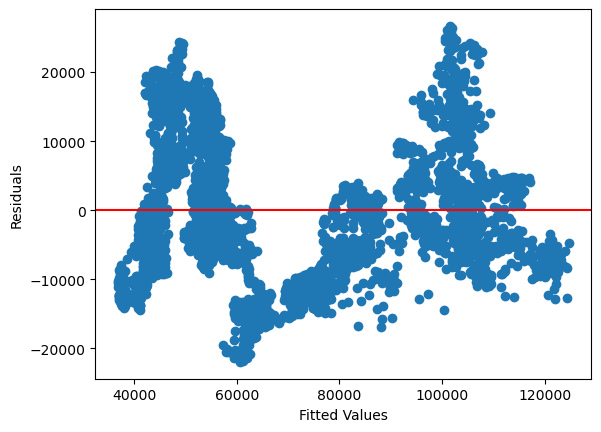

In [22]:
plt.scatter(results_ols.fittedvalues, results_ols.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show

### Explicação do Gráfico residuals x fitted values

Através da análise gráfica, é possível identificar indícios visuais que sugerem a presença de heterocedasticidade. Observa-se uma concentração de pontos em certas regiões do gráfico, juntamente com uma distribuição irregular ao longo do seu comprimento. Essa observação visual sugere que a variância dos dados não é constante, o que é um indicativo característico da heterocedasticidade. Além disso, vale mencionar que existe um padrão sutil, que se assemelha a um cone ao longo do eixo x. É necessário um esforço mais atento para visualizar esse padrão em formato de cone, que se estende entre os valores de 60000 e 120000 de fitted values. Essa formação discreta, reforça a hipótese da presença de heterocedasticidade nos dados analisados.

# Testes de Heterocedasticidade

## Breush-Pagan test

In [23]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(results_ols.resid, results_ols.model.exog)

print("Lagrange multiplier statistic: " + str(bp_lm))
print("Lagrange multiplier p-value:   " + str(bp_lm_pvalue))
print("F-statistic:                   " + str(bp_fvalue))
print("P-value of F-statistic:        " + str(bp_f_pvalue))


if bp_lm_pvalue < 0.05:
    print("Heterocedasticidade detectada")
else:
    print("Sem heterocedasticidade detectada")

Lagrange multiplier statistic: 307.5785380729232
Lagrange multiplier p-value:   2.2776779327024405e-66
F-statistic:                   110.03802625267528
P-value of F-statistic:        9.991441429642307e-69
Heterocedasticidade detectada


### Análise do teste Breush-Pagan

O teste Breusch-Pagan foi aplicado para detectar a presença de heterocedasticidade nos resíduos do modelo de regressão. Os resultados revelam uma forte evidência de heterocedasticidade, indicada pelo valor extremamente baixo do p-valor associado à estatística do multiplicador de Lagrange (2.2776055586839225e-66). A estatística F também apresenta um valor p muito baixo (9.991100611964883e-69), confirmando a significância estatística geral do modelo.

## White test (Cross Terms)

In [24]:
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(results_ols.resid, results_ols.model.exog)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))


if lm_pvalue < 0.05:
    print("Rejeitou a hipótese nula. Heterocedasticidade detectada")
else:
    print("Falha ao rejeitar a hipótese nula. Nenhuma heterocedasticidade detectada.")

Lagrange multiplier statistic: 1177.3839802725395
Lagrange multiplier p-value:   9.244143195491022e-248
F-statistic:                   177.4715117907262
P-value of F-statistic:        2.228391118380103e-288
Rejeitou a hipótese nula. Heterocedasticidade detectada


### Análise do White test (Cross Terms)

O teste White (Cross Terms) revelou evidências robustas de heterocedasticidade condicional nos resíduos do modelo de regressão com termos cruzados. A estatística do multiplicador de Lagrange apresentou um valor significativo de 1177.38, apontando para a magnitude do efeito da heterocedasticidade condicional. Além disso, o valor extremamente baixo do p-valor associado à estatística do multiplicador de Lagrange (9.24e-248) e à estatística F (2.23e-288) indicam uma forte evidência estatística para a presença da heterocedasticidade condicional.

# Modelo WLS

## Calculando weights

In [25]:
y_resid = [abs(resid) for resid in results_ols.resid]

In [26]:
X_resid = sm.add_constant(results_ols.fittedvalues)

In [27]:
mod_resid = sm.OLS(y_resid, X_resid)
res_resid = mod_resid.fit()

In [28]:
mod_fv = res_resid.fittedvalues

In [29]:
weights = 1 / (mod_fv**2)
weights

Date
2005-01-03    1.310270e-08
2005-01-04    1.309779e-08
2005-01-05    1.310037e-08
2005-01-06    1.310289e-08
2005-01-07    1.309911e-08
                  ...     
2022-12-23    1.991449e-08
2022-12-26    1.987613e-08
2022-12-27    1.970236e-08
2022-12-28    1.986149e-08
2022-12-29    1.990278e-08
Length: 4451, dtype: float64

## Construindo o modelo WLS

In [30]:
model = sm.WLS(y, X_with_constant, weights = weights)
results_wls = model.fit()

print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:               Ibovespa   R-squared:                       0.860
Model:                            WLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     9127.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:35:41   Log-Likelihood:                -47234.
No. Observations:                4451   AIC:                         9.448e+04
Df Residuals:                    4447   BIC:                         9.450e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04    432.996     61.808      0.0

### Explicação do .summary()

Ao comparar os resultados dos modelos de regressão OLS e WLS, podemos observar diferenças significativas. O modelo WLS apresenta um R-quadrado ligeiramente maior (0.860) em comparação com o modelo OLS (0.847), indicando que o modelo WLS explica uma proporção um pouco maior da variação no Ibovespa. Os valores de t e P>|t| para os coeficientes estimados são semelhantes entre os modelos, o que sugere consistência nas estimativas. No entanto, o modelo WLS possui uma estatística F mais alta (9127) em comparação com o modelo OLS (8184), indicando uma maior significância geral do modelo WLS. Ambos os modelos mostram presença de autocorrelação positiva nos resíduos, como evidenciado pelos valores baixos de Durbin-Watson (0.008). Em resumo, o modelo WLS parece ter um ajuste um pouco melhor aos dados, com um R-quadrado mais alto e uma estatística F mais elevada. 

# Autocorrelação

In [31]:
DW = 0.008

In [32]:
p = 1-(DW/2)
p

0.996

In [33]:
Y1= y - p*y.shift(1)
Y_1 = Y1.dropna()

In [34]:
X1 = X - p*X.shift(1)
X_1 = X1.dropna()

In [35]:
Z_nocorr = sm.add_constant(X_1)
reg_nocorr = sm.OLS(Y_1,Z_nocorr).fit()
reg_nocorr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Ibovespa   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1947.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:35:41   Log-Likelihood:                -35726.
No. Observations:                4450   AIC:                         7.146e+04
Df Residuals:                    4446   BIC:                         7.149e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.1002     11.555      5.807      0.000      44.446      89.754
ITUB3.SA    2280.3619     45.922     49.658      0.000    2190.333    2370.391
ENBR3.SA    1666.7683     74.675     22.320      0.000    1520.367    1813.169
VIVT3.SA     358.7503     27.198     13.190      0.000     305.429     412.072
==============================================================================
Omnibus:                      798.574   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18103.945
Skew:                           0.163   Prob(JB):                         0.00
Kurtosis:                      12.876   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Explicação do .summary()

O modelo de regressão OLS aplicado ao conjunto de dados apresenta um R-quadrado de 0.568, indicando que aproximadamente 56.8% da variação no Ibovespa é explicada pelas variáveis independentes incluídas no modelo. O ajuste do modelo não é influenciado pelo número de variáveis independentes, como indicado pelo Adj. R-squared também igual a 0.568.

Os coeficientes estimados para as variáveis independentes (ITUB3.SA, ENBR3.SA e VIVT3.SA) são estatisticamente significativos, com valores t altos e P>|t| próximos de zero. Isso indica que as variáveis têm um efeito significativo no Ibovespa.

A estatística F, que avalia a significância global do modelo, apresenta um valor de 1947, indicando que o modelo como um todo é estatisticamente significativo. O valor baixo de Prob (F-statistic) confirma essa significância estatística, sugerindo que é altamente improvável obter uma estatística F igual ou mais extrema do que a observada, assumindo-se a hipótese nula de que todos os coeficientes são iguais a zero.

O teste Durbin-Watson indica a presença de autocorrelação nos resíduos do modelo. Neste caso, o valor de 2.127 sugere que não há autocorrelação significativa nos resíduos, o que é desejável para a qualidade do modelo.

Em suma, o modelo de regressão OLS aplicado aos dados apresenta um ajuste satisfatório, com as variáveis independentes explicando uma parte significativa da variação no Ibovespa. Os coeficientes estimados são estatisticamente significativos, indicando o impacto das variáveis no Ibovespa.